# Hunter Nixon Smith

## Research question/interests
**What effects can we visualize from the transition of in-person to online/hybrid then back to inperson/hybrid courses during the COVID-19 pandemic impact the grade distribution of individual courses?**

Briefly describe your research question or interests here.
For this project my reasearch will focus on how grade distribution, mean grades and analyze how number students in a class changed from a pre covid era to a shift to online and hybrid classes and then into 2021 with a blend of hybrid, online, and in person courses. I am interested in understanding what the shift from  remote and hybrid learning has affected the academic performance of students in a varitety subjects. After completion of the project, my research aims to provide possible insights into the challenges and benefits that remote and hybrid learning, can have on individuals and insructors. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from my_code import project_functions1

file_path = ('../data/raw/rawdata.csv')

df = project_functions1.load_and_process(file_path, ['Professor', 'Title', 'Detail'])
df

,Year,Campus,Subject,Course,Avg_mean,Avg_median,Avg_25_percentile,Avg_75_percentile
0,2018.0,UBCO,ECON,101.0,66.0,66.0,65.212809,66.219968
1,2018.0,UBCO,ECON,102.0,66.0,66.0,66.018019,66.281566
2,2018.0,UBCO,ECON,204.0,65.0,65.0,61.811203,67.271683
3,2018.0,UBCO,ECON,205.0,58.0,58.0,57.908293,58.767316
4,2018.0,UBCO,ECON,221.0,71.0,71.0,71.146341,71.146341
...,...,...,...,...,...,...,...,...
954,2021.0,UBCV,POLI,449.0,80.0,80.0,73.875000,87.000000
955,2021.0,UBCV,POLI,460.0,85.0,85.0,82.235294,88.066667
956,2021.0,UBCV,POLI,462.0,80.0,80.0,79.529412,79.529412
957,2021.0,UBCV,POLI,464.0,84.0,85.0,82.631579,85.000000


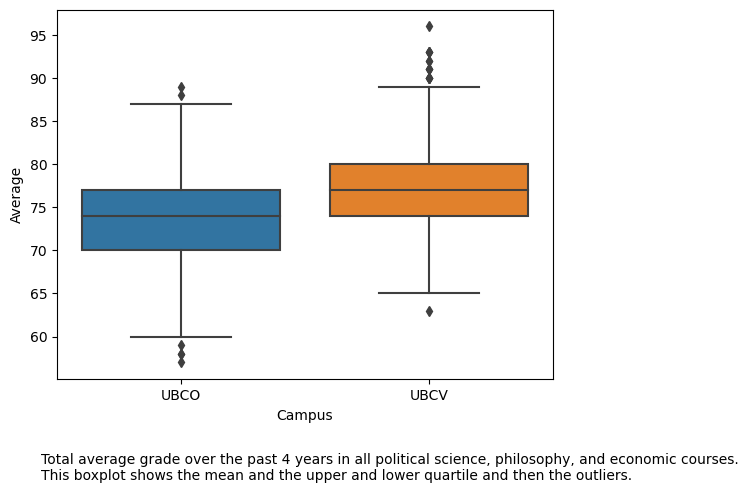

In [ ]:
Total_Grade_Average = sns.boxplot(x="Campus", y="Avg_mean", data=df)

#description for graph
plt.figtext(0.1, -0.1, "Total average grade over the past 4 years in all political science, philosophy, and economic courses.\nThis boxplot shows the mean and the upper and lower quartile and then the outliers.")
plt.ylabel('Average')
plt.savefig('analysis1image', dpi=300)



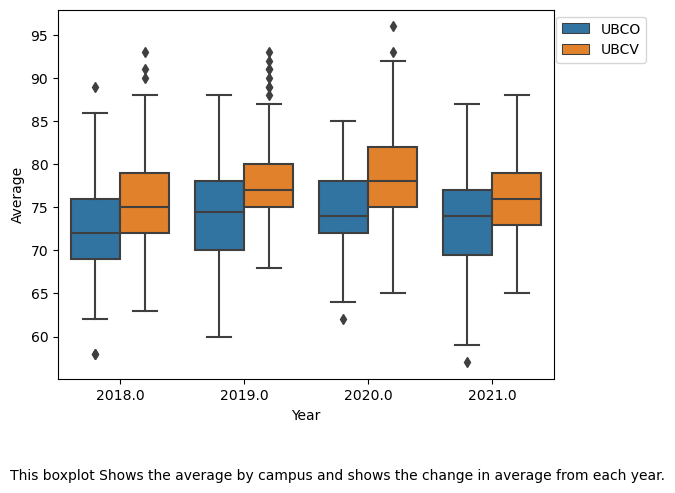

In [ ]:
Total_Average_By_Year = sns.boxplot(x="Year", y="Avg_mean", hue= 'Campus', data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
#description for graph
plt.figtext(0.05,-0.1, "This boxplot Shows the average by campus and shows the change in average from each year.") 
plt.ylabel('Average')
plt.savefig('analysisimage2', dpi=300)



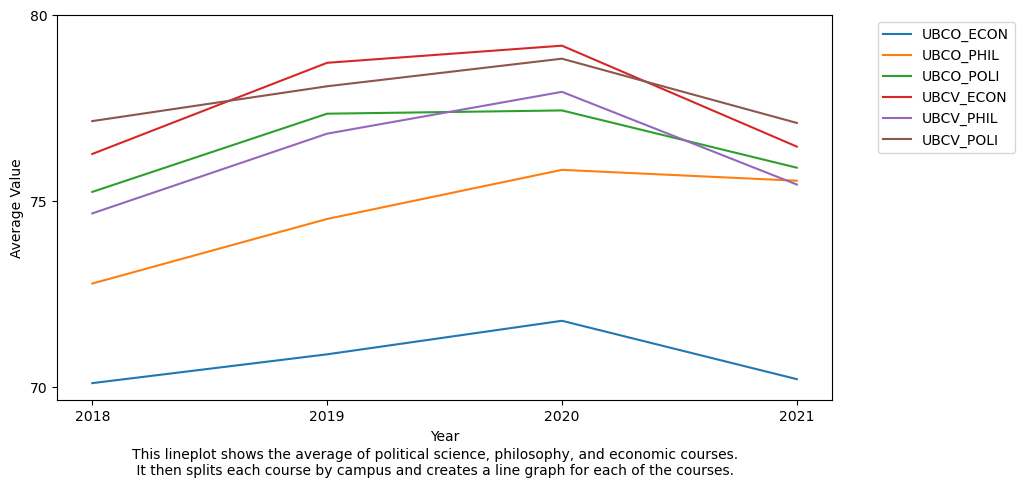

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))
#set colour
colours = {'UBCO_ECON': '#1f77b4',
          'UBCO_PHIL': '#ff7f0e',
          'UBCO_POLI': '#2ca02c',
          'UBCV_ECON': '#d62728',
          'UBCV_PHIL': '#9467bd',
          'UBCV_POLI': '#8c564b'}

# filter the data
types = ['ECON', 'PHIL', 'POLI']
data = df[df['Subject'].isin(types)]

# add a new column to the data for campus + subject
data['Campus_Subject'] = data['Campus'] + '_' + data['Subject']

# plot the lines
sns.lineplot(x='Year', y="Avg_mean", hue='Campus_Subject', data=data, palette=colours, err_style=None)

# set the y-axis ticks and label
plt.yticks([70, 75, 80])
plt.ylabel('Average Value')

# set the x-axis ticks
plt.xticks([2018, 2019, 2020, 2021])

# add the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# description
plt.figtext(0.2, -0.04, "This lineplot shows the average of political science, philosophy, and economic courses.\n It then splits each course by campus and creates a line graph for each of the courses.")
plt.savefig('analysis1image3', dpi=300)


In [ ]:
file_path = '../data/raw/rawdata.csv'
df = pd.read_csv(file_path)


In [ ]:
columns_to_drop = ['Professor', 'Title', 'Detail']
df = df.drop(columns=columns_to_drop)


In [ ]:
new_file_path = '../data/processed/processeddata.csv'
df.to_csv(new_file_path, index=False)

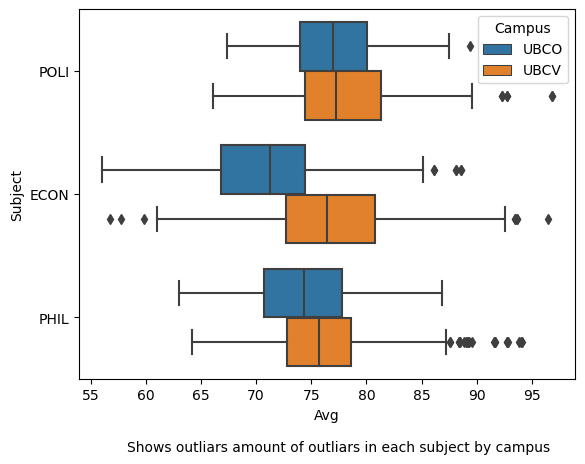

In [ ]:
sns.boxplot(data=df, x='Avg', y='Subject', hue='Campus')
# Description
plt.figtext(0.2, -0.04, "Shows outliars amount of outliars in each subject by campus")
plt.savefig('analysis1image4', dpi=300)


In [ ]:
def load_and_process(file_path, columns_to_drop):
    df = pd.read_csv(file_path)
    
    df = df.drop(columns=columns_to_drop)
    
    grouped_data = df.groupby(['Year', 'Campus', 'Subject', 'Course'])
    
    processed_data = (
        grouped_data
        .agg(Avg_mean=('Avg', 'mean'),
             Avg_median=('Avg', 'median'))
        .round(0)
        .sort_values(by=['Year', 'Campus', 'Subject', 'Course'])
        .reset_index()
        .fillna(0)
    )

    processed_data['Avg_25_percentile'] = grouped_data['Avg'].apply(lambda x: x.quantile(0.25)).values
    processed_data['Avg_75_percentile'] = grouped_data['Avg'].apply(lambda x: x.quantile(0.75)).values

    return processed_data


In [ ]:
file_path = '../data/raw/rawdata.csv'
columns_to_drop = ['Professor', 'Title', 'Detail']
df = load_and_process(file_path, columns_to_drop)

load_and_process

<function __main__.load_and_process(file_path, columns_to_drop)>